# What’s a Neural Network?
Most introductory texts to Neural Networks brings up brain analogies when describing them. Without delving into brain analogies, I find it easier to simply describe Neural Networks as a mathematical function that maps a given input to a desired output.

Neural Networks consist of the following components

An input layer, x
An arbitrary amount of hidden layers
An output layer, ŷ
A set of weights and biases between each layer, W and b
A choice of activation function for each hidden layer, σ. In this tutorial, we’ll use a Sigmoid activation function.
The diagram below shows the architecture of a 2-layer Neural Network (note that the input layer is typically excluded when counting the number of layers in a Neural Network)



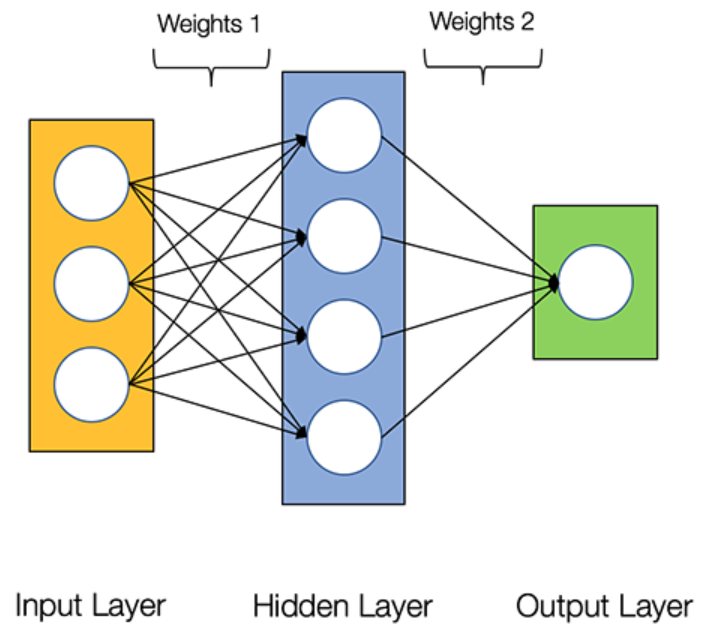

The circles represent neurons while the lines represent synapses. The role of a synapse is to multiply the inputs and weights. You can think of weights as the “strength” of the connection between neurons. Weights primarily define the output of a neural network. However, they are highly flexible. After, an activation function is applied to return an output.

Here’s a brief overview of how a simple feedforward neural network works:

Takes inputs as a matrix (2D array of numbers)

Multiplies the input by a set weights (performs a dot product aka matrix multiplication)

Applies an activation function

Returns an output

Error is calculated by taking the difference from the desired output from the data and the predicted output. This creates our gradient descent, which we can use to alter the weights

The weights are then altered slightly according to the error.

To train, this process is repeated 1,000+ times. The more the data is trained upon, the more accurate our outputs will be.

At its core, neural networks are simple. They just perform a dot product with the input and weights and apply an activation function. When weights are adjusted via the gradient of loss function, the network adapts to the changes to produce more accurate outputs.

Our neural network will model a single hidden layer with three inputs and one output. In the network, we will be predicting the score of our exam based on the inputs of how many hours we studied and how many hours we slept the day before. Our test score is the output. Here’s our sample data of what we’ll be training our Neural Network on:

In [3]:
import numpy as np

# X = (hours studying, hours sleeping), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

print(np.amax(X, axis=0))

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
print(X)
y = y/100 # max test score is 100
print(y)

[3. 9.]
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
[[0.92]
 [0.86]
 [0.89]]


In [8]:
class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

It is time for our first calculation. Remember that our synapses perform a dot product, or matrix multiplication of the input and weight. Note that weights are generated randomly and between 0 and 1.

# The calculations behind our network
In the data set, our input data, X, is a 3x2 matrix. Our output data, y, is a 3x1 matrix. Each element in matrix X needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron in the hidden layer. Here’s how the first input data element (2 hours studying and 9 hours sleeping) would calculate an output in the network:


This image breaks down what our neural network actually does to produce an output. First, the products of the random generated weights (.2, .6, .1, .8, .3, .7) on each synapse and the corresponding inputs are summed to arrive as the first values of the hidden layer. These sums are in a smaller font as they are not the final values for the hidden layer.

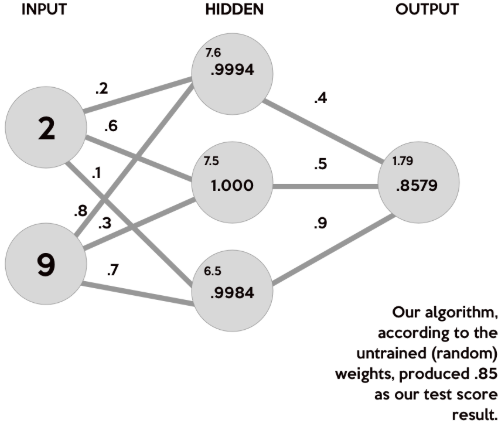

In [6]:
print((2 * .2) + (9 * .8))
print((2 * .6) + (9 * .3))
print((2 * .1) + (9 * .7))

7.6000000000000005
3.8999999999999995
6.5


To get the final value for the hidden layer, we need to apply the activation function. The role of an activation function is to introduce nonlinearity. An advantage of this is that the output is mapped from a range of 0 and 1, making it easier to alter weights in the future.

There are many activation functions out there. In this case, we’ll stick to one of the more popular ones - the sigmoid function.


S(7.6) = 0.999499799
S(7.5) = 1.000553084
S(6.5) = 0.998498818
Now, we need to use matrix multiplication again, with another set of random weights, to calculate our output layer value.

(.9994 * .4) + (1.000 * .5) + (.9984 * .9) = 1.79832
Lastly, to normalize the output, we just apply the activation function again.

S(1.79832) = .8579443067
And, there you go! Theoretically, with those weights, out neural network will calculate .85 as our test score! However, our target was .92. Our result wasn’t poor, it just isn’t the best it can be. We just got a little lucky when I chose the random weights for this example.

How do we train our model to learn? Well, we’ll find out very soon. For now, let’s countinue coding our network.

If you are still confused, I highly reccomend you check out this informative video which explains the structure of a neural network with the same example.

# Implementing the calculations
Now, let’s generate our weights randomly using np.random.randn(). Remember, we’ll need two sets of weights. One to go from the input to the hidden layer, and the other to go from the hidden to output layer.

In [11]:
import numpy as np

# X = (hours sleeping, hours studying), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
y = y/100 # max test score is 100

class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        print(self.W1)
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer
        print(self.W2)

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3) # final activation function
        return o

    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s))

NN = Neural_Network()

#defining our output
o = NN.forward(X)

print( "Predicted Output: \n" + str(o) )
print( "Actual Output: \n" + str(y) )

[[ 0.7151916   0.40515536  1.40145037]
 [ 0.98608437 -0.4204084  -2.44163279]]
[[ 0.58035236]
 [-2.35717847]
 [ 0.98282373]]
Predicted Output: 
[[0.39156661]
 [0.39278438]
 [0.41264546]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]


# Backpropagation
The “learning” of our network
Since we have a random set of weights, we need to alter them to make our inputs equal to the corresponding outputs from our data set. This is done through a method called backpropagation.

Backpropagation works by using a loss function to calculate how far the network was from the target output.

Calculating error
One way of representing the loss function is by using the mean sum squared loss function:

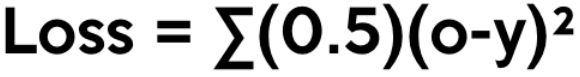

In this function, o is our predicted output, and y is our actual output. Now that we have the loss function, our goal is to get it as close as we can to 0. That means we will need to have close to no loss at all. As we are training our network, all we are doing is minimizing the loss.

To figure out which direction to alter our weights, we need to find the rate of change of our loss with respect to our weights. In other words, we need to use the derivative of the loss function to understand how the weights affect the input.

In this case, we will be using a partial derivative to allow us to take into account another variable.

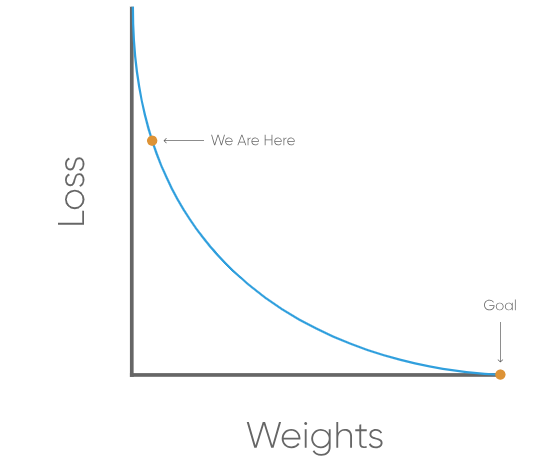

In [18]:
import numpy as np

# X = (hours studying, hours sleeping), y = score on test, xPredicted = 4 hours studying & 8 hours sleeping (input data for prediction)
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
xPredicted = np.array(([4,8]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
xPredicted = xPredicted/np.amax(xPredicted, axis=0) # maximum of xPredicted (our input data for the prediction)
y = y/100 # max test score is 100

class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3) # final activation function
        return o

    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s))

    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        # backward propagate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train(self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)

    def saveWeights(self):
        np.savetxt("w1.txt", self.W1, fmt="%s")
        np.savetxt("w2.txt", self.W2, fmt="%s")

    def predict(self):
        print( "Predicted data based on trained weights: " )
        print( "Input (scaled): \n" + str(xPredicted) )
        print( "Output: \n" + str(self.forward(xPredicted)) )

NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
    print( "# " + str(i) + "\n" )
    print( "Input (scaled): \n" + str(X) )
    print( "Actual Output: \n" + str(y) )
    print( "Predicted Output: \n" + str(NN.forward(X)) )
    print( "Loss: \n" + str(np.mean(np.square(y - NN.forward(X)))) ) # mean sum squared loss
    print( "\n" )
    NN.train(X, y)

NN.saveWeights()
NN.predict()

# 0

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.16405593]
 [0.17260029]
 [0.19074636]]
Loss: 
0.5109751473919114


# 1

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.21156472]
 [0.21554399]
 [0.23631281]]
Loss: 
0.44817034756352275


# 2

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.26850146]
 [0.26720522]
 [0.28853437]]
Loss: 
0.3792056361845176


# 3

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.3309138 ]
 [0.32494226]
 [0.34357189]]
Loss: 
0.31063100417197553


# 4

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.      


# 226

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90581512]
 [0.88513059]
 [0.87916671]]
Loss: 
0.00031670589141605525


# 227

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.9058136 ]
 [0.88511823]
 [0.87918135]]
Loss: 
0.00031640758427066516


# 228

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90581202]
 [0.88510582]
 [0.8791959 ]]
Loss: 
0.00031610989052924894


# 229

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90581039]
 [0.88509337]
 [0.87921037]]
Loss: 
0.00031581280752207


# 230

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 

Predicted Output: 
[[0.90537877]
 [0.88302322]
 [0.88109824]]
Loss: 
0.0002743634788183698


# 393

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90537626]
 [0.88301143]
 [0.88110846]]
Loss: 
0.00027414636028480743


# 394

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90537376]
 [0.88299965]
 [0.88111868]]
Loss: 
0.0002739296364430061


# 395

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90537126]
 [0.88298789]
 [0.88112889]]
Loss: 
0.0002737133063569743


# 396

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90536876]
 [0.88297614]
 [0.88113909]]
L


Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90502448]
 [0.88123322]
 [0.88267209]]
Loss: 
0.00024293791444095407


# 560

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90502272]
 [0.88122349]
 [0.88268077]]
Loss: 
0.00024277554117059917


# 561

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90502095]
 [0.88121377]
 [0.88268944]]
Loss: 
0.0002426134377286715


# 562

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90501919]
 [0.88120407]
 [0.8826981 ]]
Loss: 
0.0002424516035266591


# 563

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.5555

# 733

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.9047669 ]
 [0.87968803]
 [0.88406655]]
Loss: 
0.00021829058505852054


# 734

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90476567]
 [0.87967993]
 [0.88407394]]
Loss: 
0.0002181674963067863


# 735

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90476445]
 [0.87967184]
 [0.88408132]]
Loss: 
0.00021804459491629323


# 736

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90476324]
 [0.87966375]
 [0.8840887 ]]
Loss: 
0.0002179218805102755


# 737

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 

# 913

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90458452]
 [0.87835036]
 [0.88529764]]
Loss: 
0.00019882833549044008


# 914

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90458369]
 [0.87834355]
 [0.88530396]]
Loss: 
0.00019873368430293263


# 915

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90458287]
 [0.87833674]
 [0.88531028]]
Loss: 
0.00019863916531889875


# 916

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.90458205]
 [0.87832994]
 [0.88531659]]
Loss: 
0.00019854477829198277


# 917

Input (scaled): 
[[0.66666667 1.        ]
 [0.3333333